<a href="https://colab.research.google.com/github/TeamHub2/Deep-Learning/blob/main/monkeypox_efficientnet_b3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
train_dir = '/content/drive/MyDrive/Monkey Pox Dataset/Train'
val_dir = '/content/drive/MyDrive/Monkey Pox Dataset/Val'
test_dir = '/content/drive/MyDrive/Monkey Pox Dataset/Test'

In [ ]:
#import libraries
import tensorflow as tf
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.models import Sequential
from keras.models import load_model
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.keras import layers, Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import os

In [ ]:
train_dir = "/content/drive/MyDrive/Monkey Pox Dataset/Train"
val_dir = "/content/drive/MyDrive/Monkey Pox Dataset/Val"
test_dir = "/content/drive/MyDrive/Monkey Pox Dataset/Test"

In [ ]:
IMG_SIZE = (224, 224)

train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                 image_size=IMG_SIZE,
                                                                 label_mode="binary",
                                                                 batch_size=32)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                 image_size=IMG_SIZE,
                                                                 label_mode="binary",
                                                                 batch_size=32,
                                                                shuffle=False)

val_data = tf.keras.preprocessing.image_dataset_from_directory(directory=val_dir,
                                                                 image_size=IMG_SIZE,
                                                                 label_mode="binary",
                                                                 batch_size=32,
                                                                shuffle=False)

Found 1575 files belonging to 2 classes.
Found 45 files belonging to 2 classes.
Found 420 files belonging to 2 classes.


In [ ]:
# Visualizing data
def visualize_random_images(dataset_type="train", label_type="Others"):
    
    sample = 9
    
    plt.figure(figsize=(15, 8))
    type_dir = train_dir if dataset_type=="train" else test_dir
    base_dir = os.path.join(type_dir, label_type)
    images = random.sample(os.listdir(base_dir), 9)
    
    for i, image in enumerate(images):
        plt.subplot(3, 3, i+1)
        img = plt.imread(os.path.join(base_dir, image))
        plt.imshow(img)

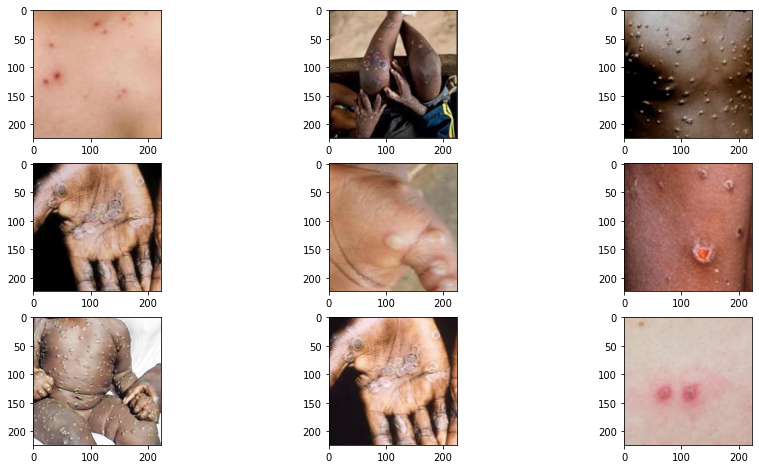

In [ ]:
visualize_random_images("train", "Monkeypox")

In [ ]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
base_model = tf.keras.applications.EfficientNetB3(include_top=False)
base_model.trainable = True

for layer in base_model.layers[:-5]:
  layer.trainable = False

inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
base_layer = base_model(inputs)
dropout_layer_1 = layers.Dropout(0.5)(base_layer)
flat_layer = layers.Flatten()(dropout_layer_1)
dense_1 = layers.Dense(256, activation="relu")(flat_layer)
dropout_layer_2 = layers.Dropout(0.5)(dense_1)
dense_2 = layers.Dense(128, activation="relu")(dropout_layer_2)
outputs = layers.Dense(1, activation="sigmoid")(dense_2)
model = Model(inputs, outputs)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
                loss='binary_crossentropy',
                metrics=['accuracy'])

history = model.fit(train_data,
                       epochs=20,
                       validation_data=val_data)

Epoch 1/20
50/50 [==============================] - 214s 4s/step - loss: 4.3868 - accuracy: 0.8063 - val_loss: 6.6077 - val_accuracy: 0.7405
Epoch 2/20
50/50 [==============================] - 9s 164ms/step - loss: 0.5442 - accuracy: 0.9162 - val_loss: 3.0599 - val_accuracy: 0.7595
Epoch 3/20
50/50 [==============================] - 9s 165ms/step - loss: 0.2840 - accuracy: 0.9441 - val_loss: 0.5961 - val_accuracy: 0.7929
Epoch 4/20
50/50 [==============================] - 9s 165ms/step - loss: 0.2009 - accuracy: 0.9562 - val_loss: 0.7662 - val_accuracy: 0.7476
Epoch 5/20
50/50 [==============================] - 9s 165ms/step - loss: 0.0977 - accuracy: 0.9784 - val_loss: 0.5984 - val_accuracy: 0.8095
Epoch 6/20
50/50 [==============================] - 9s 166ms/step - loss: 0.0614 - accuracy: 0.9810 - val_loss: 0.9119 - val_accuracy: 0.7952
Epoch 7/20
50/50 [==============================] - 9s 168ms/step - loss: 0.0663 - accuracy: 0.9867 - val_loss: 0.6484 - val_accuracy: 0.8048
Epoch 8

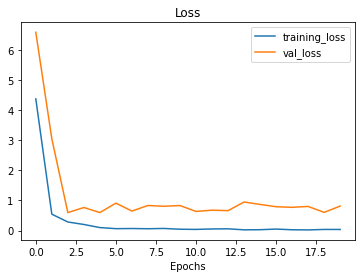

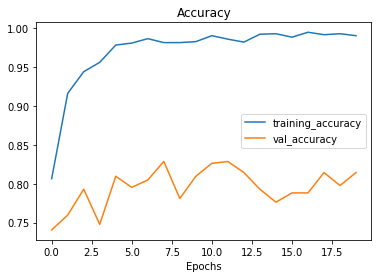

In [ ]:
plot_loss_curves(history)

In [ ]:
model.evaluate(test_data)

2/2 [==============================] - 17s 5s/step - loss: 0.8430 - accuracy: 0.8889


[0.8430362939834595, 0.8888888955116272]

In [ ]:
y_pred = tf.math.round(model.predict(test_data))
y_true = []
for images, labels in test_data.unbatch():
  y_true.append(labels.numpy())

2/2 [==============================] - 2s 151ms/step


In [ ]:
accuracy_score(y_true, y_pred)

0.8888888888888888